In [3]:
# import csv from C:\Users\todof\OneDrive\Documents\Polytechnique\EA\closest_pointsGlobal.csv

import csv
import numpy as np
import pandas as pd

df = pd.read_csv('whole_clusters_alltest.csv', sep=',')
# remove "Unnamed: 0" column
df = df.drop("Unnamed: 0", axis=1)

list_jobs = set(df["job"].unique()) | set(df["predicted job"].unique())
df

,cluster,keywords,sex,job,predicted job,bio
0,0,['Rich'],1,photographer,photographer,He graduated with a degree in journalism from ...
1,0,['Rich'],0,filmmaker,filmmaker,Columbus is known for directing such movies as...
2,0,['Rich'],1,poet,poet,"He is the author of three collections, most re..."
3,0,['Rich'],1,filmmaker,filmmaker,"His directorial debut, ‘Stealin’ Home’, was on..."
4,0,['Rich'],1,filmmaker,filmmaker,He has directed several short films that have ...
...,...,...,...,...,...,...
19195,99,['Sex'],1,filmmaker,filmmaker,He now lives and works in Los Angeles. At the ...
19196,99,['Sex'],0,poet,poet,Her poems and prose can be found at Glass: A J...
19197,99,['Sex'],1,filmmaker,filmmaker,"For this exhibition he presents Lot , Grave C,..."
19198,99,['Sex'],1,physician,poet,He divides his time between London and Beirut....


In [4]:
# make a bar chart for the number of errors for each class
from math import e

df["mistake"]=df["job"]!=df["predicted job"]
# rename keywords column as "keyword"
df=df.rename(columns={"keywords":"keyword"})
df["sex"] = df["sex"].replace({0: "woman", 1: "man"})
df["keyword"] = df["keyword"]+df["sex"].astype(str)
df["keyword"] =df["keyword"].str.replace("\[", "Keyword: ")
df["keyword"] =df["keyword"].str.replace("'", "")
df["keyword"] =df["keyword"].str.replace("\]", " - Gender: ")



error_data_set=df.groupby(["keyword"]).agg({"mistake":sum})
error_data_set["error rate"]=error_data_set["mistake"]/df.groupby(["keyword"]).agg({"mistake":"count"})["mistake"]
# add keyword column from df
error_data_set["keyword"]=df.groupby(["keyword"]).agg({"keyword":'first'})["keyword"]
# Add the number of lines for each keyword
error_data_set["number of lines"]=df.groupby(["keyword"]).agg({"mistake":"count"})["mistake"]
# sort by error rate
error_data_set=error_data_set.sort_values("error rate", ascending=False)
df

C:\Users\todof\AppData\Local\Temp\ipykernel_7440\1519790735.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df["keyword"] =df["keyword"].str.replace("\[", "Keyword: ")
C:\Users\todof\AppData\Local\Temp\ipykernel_7440\1519790735.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df["keyword"] =df["keyword"].str.replace("\]", " - Gender: ")


,cluster,keyword,sex,job,predicted job,bio,mistake
0,0,Keyword: Rich - Gender: man,man,photographer,photographer,He graduated with a degree in journalism from ...,False
1,0,Keyword: Rich - Gender: woman,woman,filmmaker,filmmaker,Columbus is known for directing such movies as...,False
2,0,Keyword: Rich - Gender: man,man,poet,poet,"He is the author of three collections, most re...",False
3,0,Keyword: Rich - Gender: man,man,filmmaker,filmmaker,"His directorial debut, ‘Stealin’ Home’, was on...",False
4,0,Keyword: Rich - Gender: man,man,filmmaker,filmmaker,He has directed several short films that have ...,False
...,...,...,...,...,...,...,...
19195,99,Keyword: Sex - Gender: man,man,filmmaker,filmmaker,He now lives and works in Los Angeles. At the ...,False
19196,99,Keyword: Sex - Gender: woman,woman,poet,poet,Her poems and prose can be found at Glass: A J...,False
19197,99,Keyword: Sex - Gender: man,man,filmmaker,filmmaker,"For this exhibition he presents Lot , Grave C,...",False
19198,99,Keyword: Sex - Gender: man,man,physician,poet,He divides his time between London and Beirut....,True


In [5]:
# Add error rate and number of lines from error_data_set to df
df["error rate"]=df["keyword"].map(error_data_set["error rate"])
df["number of lines"]=df["keyword"].map(error_data_set["number of lines"])
# remove mistake column
df=df.drop("mistake", axis=1)
df

,cluster,keyword,sex,job,predicted job,bio,error rate,number of lines
0,0,Keyword: Rich - Gender: man,man,photographer,photographer,He graduated with a degree in journalism from ...,0.274709,2064
1,0,Keyword: Rich - Gender: woman,woman,filmmaker,filmmaker,Columbus is known for directing such movies as...,0.257407,540
2,0,Keyword: Rich - Gender: man,man,poet,poet,"He is the author of three collections, most re...",0.274709,2064
3,0,Keyword: Rich - Gender: man,man,filmmaker,filmmaker,"His directorial debut, ‘Stealin’ Home’, was on...",0.274709,2064
4,0,Keyword: Rich - Gender: man,man,filmmaker,filmmaker,He has directed several short films that have ...,0.274709,2064
...,...,...,...,...,...,...,...,...
19195,99,Keyword: Sex - Gender: man,man,filmmaker,filmmaker,He now lives and works in Los Angeles. At the ...,0.186192,956
19196,99,Keyword: Sex - Gender: woman,woman,poet,poet,Her poems and prose can be found at Glass: A J...,0.184435,1876
19197,99,Keyword: Sex - Gender: man,man,filmmaker,filmmaker,"For this exhibition he presents Lot , Grave C,...",0.186192,956
19198,99,Keyword: Sex - Gender: man,man,physician,poet,He divides his time between London and Beirut....,0.186192,956


In [6]:
from os import error


list_jobs=df["job"].unique().tolist()
print(list_jobs)
for job in list_jobs:
    error_data_set[job+"_false_positive"]=df[(df["job"]==job) & (df["predicted job"]!= job)].groupby(["keyword"]).agg({"job":"count"})
    error_data_set[job+"_false_negative"]=df[(df["job"]!=job) & (df["predicted job"]== job)].groupby(["keyword"]).agg({"job":"count"})
    error_data_set[job+"number"]=df[(df["job"]==job)].groupby(["keyword"]).agg({"job":"count"})

['photographer', 'filmmaker', 'poet', 'teacher', 'dj', 'journalist', 'architect', 'comedian', 'attorney', 'painter', 'psychologist', 'model', 'composer', 'professor', 'accountant', 'software_engineer', 'pastor', 'interior_designer', 'paralegal', 'physician', 'yoga_teacher', 'nurse', 'personal_trainer', 'dietitian', 'dentist', 'surgeon', 'rapper', 'chiropractor']


In [7]:
# remove first column
error_data_set=error_data_set.drop("keyword", axis=1)
# reset index
error_data_set.reset_index(inplace=True)
error_data_set


,keyword,mistake,error rate,number of lines,photographer_false_positive,photographer_false_negative,photographernumber,filmmaker_false_positive,filmmaker_false_negative,filmmakernumber,...,dentistnumber,surgeon_false_positive,surgeon_false_negative,surgeonnumber,rapper_false_positive,rapper_false_negative,rappernumber,chiropractor_false_positive,chiropractor_false_negative,chiropractornumber
0,Keyword: Parent - Gender: man,1261,0.330884,3811,15.0,73.0,158.0,20.0,8.0,83.0,...,264.0,56.0,23.0,142.0,5.0,6.0,7.0,37.0,9.0,54.0
1,Keyword: Parent - Gender: woman,1136,0.286796,3961,22.0,46.0,152.0,38.0,3.0,84.0,...,397.0,151.0,4.0,272.0,15.0,3.0,39.0,11.0,12.0,27.0
2,Keyword: Rich - Gender: man,567,0.274709,2064,15.0,59.0,162.0,31.0,24.0,261.0,...,24.0,13.0,5.0,14.0,15.0,19.0,93.0,4.0,NaN,5.0
3,Keyword: Rich - Gender: woman,139,0.257407,540,6.0,5.0,33.0,13.0,5.0,46.0,...,3.0,NaN,NaN,NaN,11.0,7.0,47.0,NaN,NaN,NaN
4,Keyword: Religion - Gender: man,69,0.211656,326,NaN,2.0,5.0,NaN,1.0,1.0,...,6.0,2.0,NaN,4.0,NaN,NaN,NaN,3.0,NaN,3.0
5,Keyword: PhD - Gender: man,168,0.195122,861,4.0,4.0,17.0,5.0,3.0,49.0,...,5.0,4.0,NaN,12.0,NaN,NaN,NaN,1.0,1.0,2.0
6,Keyword: Health - Gender: woman,345,0.193820,1780,NaN,1.0,NaN,NaN,NaN,NaN,...,98.0,80.0,6.0,212.0,NaN,NaN,NaN,52.0,3.0,73.0
7,Keyword: Sex - Gender: man,178,0.186192,956,10.0,42.0,157.0,11.0,6.0,106.0,...,3.0,3.0,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN
8,Keyword: Sex - Gender: woman,346,0.184435,1876,23.0,60.0,273.0,39.0,9.0,289.0,...,1.0,5.0,NaN,5.0,4.0,NaN,14.0,NaN,NaN,NaN
9,Keyword: Religion - Gender: woman,100,0.176367,567,3.0,3.0,25.0,3.0,NaN,28.0,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


[233, 233, 197.0, 196.0, 172.0, 167, 145.0, 141.0, 138.0, 129.0, 88.0, 85.0, 79.0, 60.0, 52.0, 52.0, 46.0, 42.0, 40.0, 39.0, 38.0, 31.0, 30.0, 28.0, 22.0, 22.0, 11.0, 6.0]


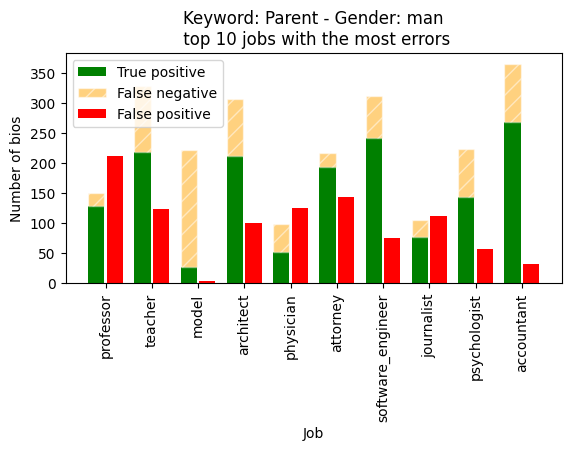

Parent
 man
[281, 176.0, 166.0, 155.0, 136.0, 130, 118.0, 113, 112.0, 106.0, 101.0, 97.0, 82.0, 68.0, 50.0, 45.0, 41.0, 40.0, 38.0, 37.0, 30.0, 27.0, 25.0, 24.0, 23.0, 22.0, 18.0, 11.0]


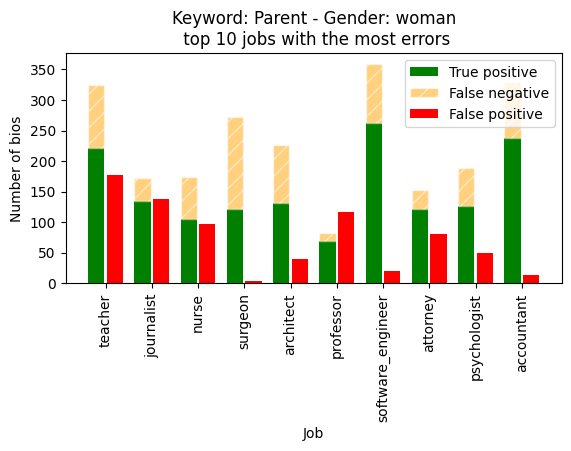

Parent
 woman
[147.0, 122.0, 84.0, 82, 76.0, 74.0, 56.0, 55.0, 52, 51, 50.0, 37.0, 34.0, 30.0, 28.0, 26.0, 18.0, 18.0, 18.0, 18.0, 11.0, 10.0, 10.0, 8.0, 7.0, 5.0, 4.0, 3.0]


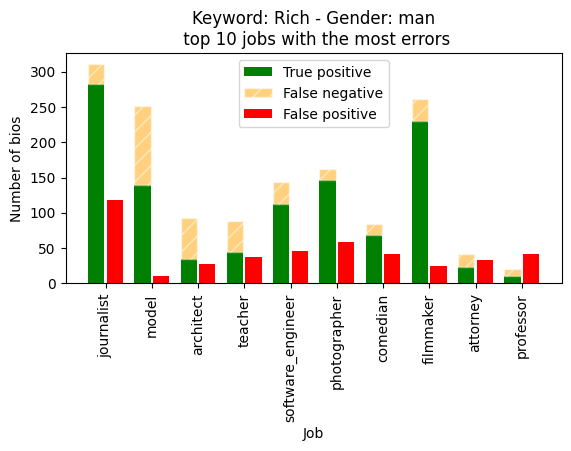

Rich
 man
[102.0, 96, 83.0, 82.0, 57.0, 54, 48.0, 36.0, 18.0, 16.0, 14.0, 14.0, 12, 10.0, 8.0, 7.0, 7.0, 5.0, 5.0, 5.0, 4.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 0.0]


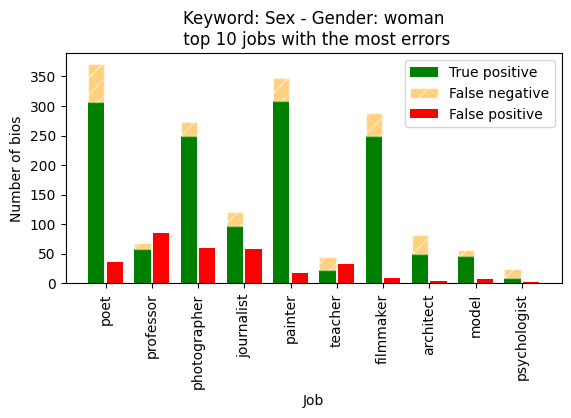

Sex
 woman
[134, 118.0, 92.0, 86.0, 55.0, 51.0, 35.0, 32, 23.0, 21, 9.0, 9.0, 7.0, 7.0, 4.0, 2.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


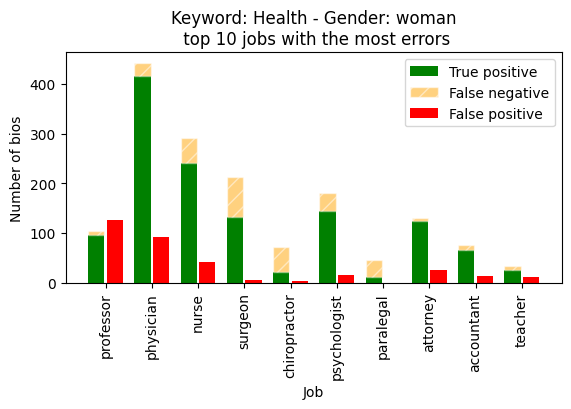

Health
 woman
[55.0, 52, 52.0, 41.0, 26, 24.0, 17.0, 14, 12.0, 11.0, 10.0, 9.0, 9.0, 5.0, 4.0, 3.0, 3.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]


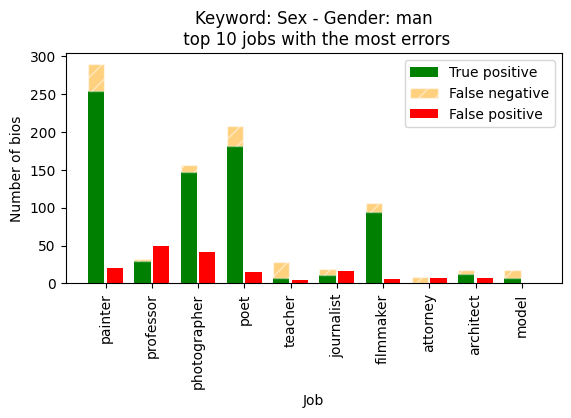

Sex
 man
[90, 80.0, 58.0, 24.0, 14.0, 14, 14.0, 9.0, 8.0, 6, 5.0, 4.0, 3.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


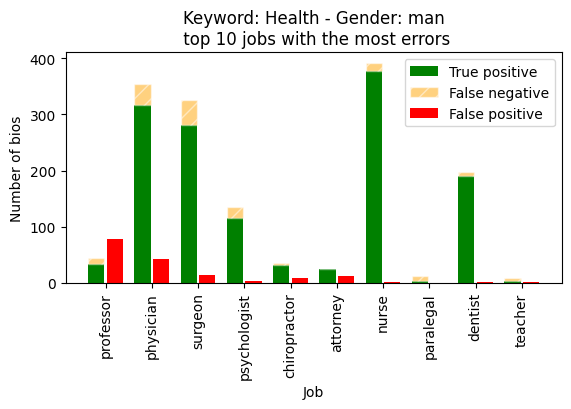

Health
 man
[111, 30.0, 25, 21, 20.0, 20.0, 19.0, 17.0, 13.0, 10.0, 8.0, 8.0, 5.0, 4.0, 4.0, 4.0, 4.0, 3.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0]


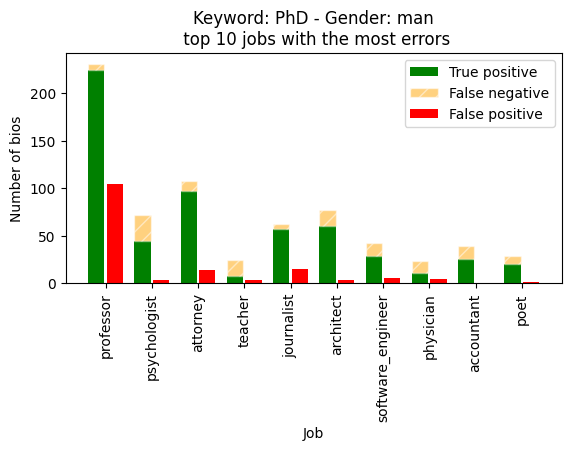

PhD
 man
[104, 32.0, 30.0, 30.0, 18, 16.0, 12, 9.0, 8.0, 8.0, 8.0, 6.0, 6.0, 5.0, 3.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


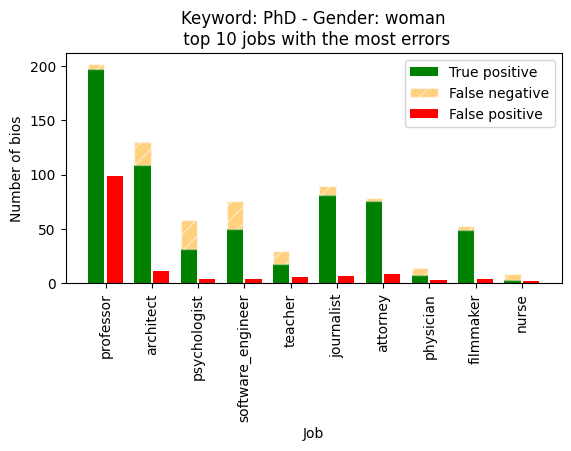

PhD
 woman
[65.0, 32.0, 24, 18.0, 18.0, 15.0, 13.0, 11.0, 10.0, 9.0, 9.0, 9, 9.0, 7, 5.0, 5.0, 4.0, 4.0, 4.0, 3.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]


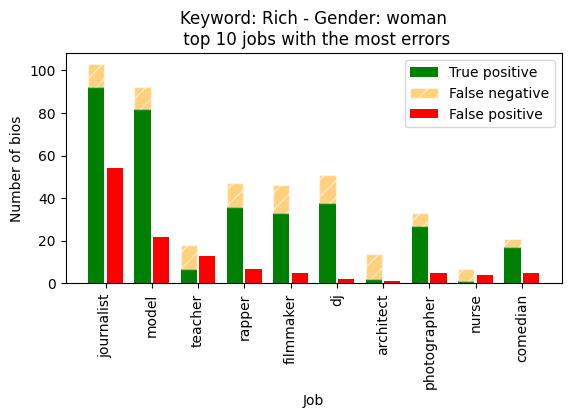

Rich
 woman
[53, 26, 21, 18.0, 13.0, 8.0, 8.0, 7.0, 7.0, 7.0, 6.0, 6.0, 5.0, 4.0, 3.0, 3.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


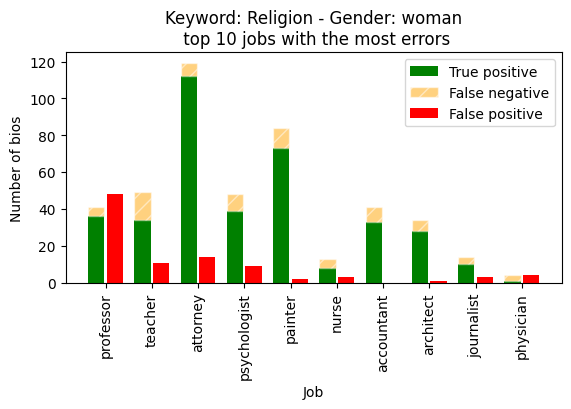

Religion
 woman
[33, 31, 17, 10.0, 9.0, 8.0, 5.0, 4.0, 4.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


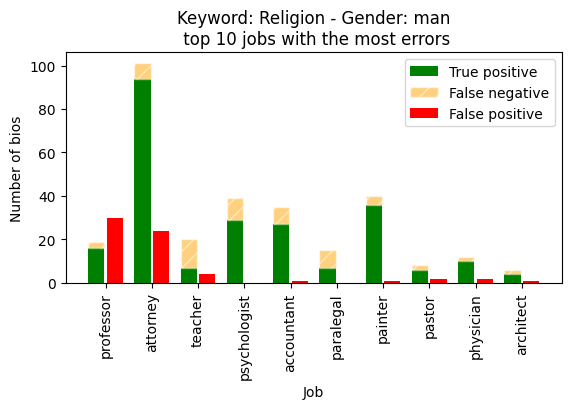

Religion
 man


In [8]:
import matplotlib.pyplot as plt

# Set the colors for positive and negative bars

positive_color = 'orange'
negative_color = 'red'
# fill na with 0 in error dataset
error_data_set=error_data_set.fillna(0)
# Get the list of jobs
jobs = list_jobs
# sort error data set by keyword and then by false positive
# Create a bar chart for each job
N=10
# sort error data set by mistake
error_data_set=error_data_set.sort_values("mistake", ascending=False)
for keyword in error_data_set["keyword"].unique().tolist():
    # Get the data for positive and negative bars
    positive_data = [error_data_set[error_data_set["keyword"]==keyword][job+"_false_positive"].values[0] for job in jobs]
    negative_data = [error_data_set[error_data_set["keyword"]==keyword][job+"_false_negative"].values[0] for job in jobs]
    total_data=[error_data_set[(error_data_set["keyword"]==keyword)][job+"number"].values[0] for job in jobs]
    error_data=[positive_data[i]+negative_data[i] for i in range(len(positive_data))]   
    permutation_order = np.argsort(error_data)[::-1]
    positive_data=[positive_data[i] for i in permutation_order] # for some reason the first element is not right
    negative_data=[negative_data[i] for i in permutation_order]
    total_data=[total_data[i] for i in permutation_order]
    jobs=[jobs[i] for i in permutation_order]
    error_data=[error_data[i] for i in permutation_order]
    print(error_data)
    # make a bar plot with the jobs on the x axis and the number of false positive and false negative on the y axis as a bar chart
    fig, ax = plt.subplots()
    ax.bar(np.arange(len(jobs))[:N], [total_data[i]- positive_data[i] for i in range(len(jobs))][:N], width=0.35, color="green")
    
    ax.bar(np.arange(len(jobs))[:N], positive_data[:N], width=0.35, color=positive_color, bottom=[total_data[i]- positive_data[i] for i in range(len(jobs))][:N], hatch="//",edgecolor='white',  alpha=0.5)
    ax.bar(np.arange(len(jobs))[:N]+0.4, negative_data[:N], width=0.35, color=negative_color)
    ax.set_title(keyword+ "\n top 10 jobs with the most errors")
    ax.set_ylabel('Number of bios')
    ax.set_xlabel('Job')
    # rotate the x axis labels
    plt.xticks(np.arange(len(jobs))[:N]+0.2, jobs[:N], rotation=90)
    ax.legend(['True positive', 'False negative', 'False positive'])
    # rotate the x axis labels
    plt.xticks(rotation=90)
    # add margin to the bottom of the plot
    plt.subplots_adjust(bottom=0.4)
    plt.show()
    keyword_to_save=keyword.split("Keyword:")[1].split(" ")[1]
    gender_to_save=keyword.split("Gender:")[1]
    print(keyword_to_save)
    print(gender_to_save)
    # save the figure as "figure+{keyword}.png"
    fig.savefig("figure"+keyword_to_save+"Gender:" + gender_to_save+".png")


In [9]:
print(df["keyword"].unique().tolist())

['Keyword: Rich - Gender: man', 'Keyword: Rich - Gender: woman', 'Keyword: Religion - Gender: woman', 'Keyword: Religion - Gender: man', 'Keyword: Parent - Gender: man', 'Keyword: Parent - Gender: woman', 'Keyword: Health - Gender: man', 'Keyword: Health - Gender: woman', 'Keyword: Sex - Gender: woman', 'Keyword: Sex - Gender: man', 'Keyword: PhD - Gender: woman', 'Keyword: PhD - Gender: man']
